In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2022

@author: S.W
"""

'\nCreated on 2022\n\n@author: S.W\n'

- keras pre-trained model

  https://keras.io/api/applications/

# 1. 학습에 필요한 라이브러리 불러오기

In [2]:
import PIL
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# 2. Pre-trained Model 불러오기

In [3]:
model = tf.keras.applications.VGG16(weights='imagenet')

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

image data shape:  (224, 224, 3)
AxesImage(80,52.8;496x369.6)


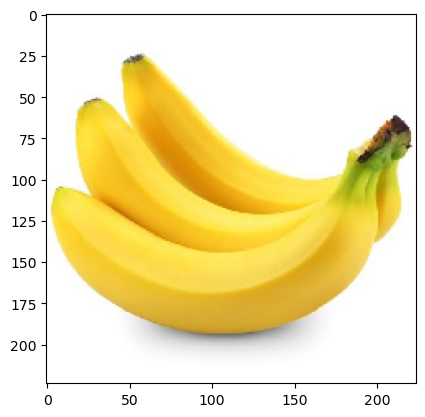

In [5]:
img_path = './data/banana.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # 이미지 로드 및 이미지 사이즈 조정
x = image.img_to_array(img) # 이미지를 arrray 형태로 변환

print("image data shape: ", x.shape)
print(plt.imshow(x.astype(np.uint8)))

In [6]:
x = np.expand_dims(x, axis=0) # CNN input data 형태에 맞게 차원 확장
x = preprocess_input(x)

print("input data shape: ", x.shape)

input data shape:  (1, 224, 224, 3)


# 3. 모델 예측 결과

In [7]:
preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n07753592', 'banana', 0.9484923), ('n07720875', 'bell_pepper', 0.010657596), ('n07716358', 'zucchini', 0.010022652)]


2023-04-21 15:25:18.003997: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
